# Week 1 Homework for Mathematical Experiments

## Q 1.1

### Question
let $f_n(x) = \sum\limits_{k=1}^n (-1)^k \dfrac {x^{2k +1}} {(2k + 1)!}$, for $n = 3, 4, \cdots, 7$ calculate zeros near $x = 3$ using newton's method, analyze zeros as n increases.

------

### Solution

**About newton's method for apporximating zeros:**

Ignoring all the maths, the following iteration formula comes out:

$$
x_n = x_{n-1} - \dfrac {f(x_{n-1})} {f^{\prime}(x_{n-1})}
$$

So let's break down the goal:
* create $f$
* create $f^{\prime}$
* create iteration

#### Step one: Declare the function:

> Notes about the following declaration:
> * Inline code is used to save space & time, jupyter magic is another workaround, see [here](https://am111.readthedocs.io/en/latest/jmatlab_use.html)
> * `sysm k` is used to prevent variable not found error, `symsum` would provide value for `k`

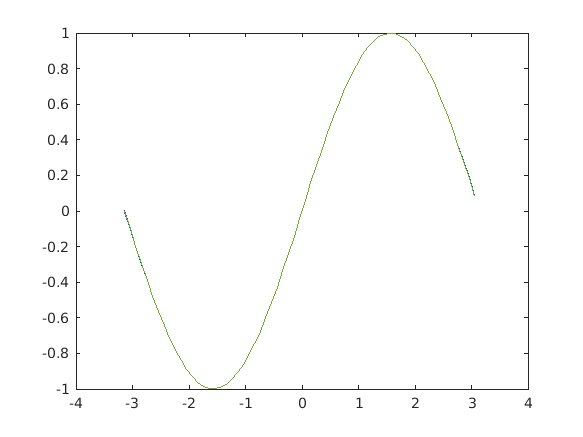

In [1]:
syms k
f = @(n,x) symsum((-1)^k*x.^(2*k+1)/factorial(2*k+1),k,0,n+1);

% Visualization:
x = -pi:0.1:pi;
for n=3:7
    y = f(n,x);
    plot(x,y)
    % plot multiple graph into one, otherwise only one graph would be created
    hold on
end
hold off

#### Step two: Create $f^{\prime}$

In [2]:
delta = 1e-8;

In [3]:
div = @(f,x) (f(x+delta)-f(x-delta))/(2*delta);

% test:
square = @(x) x^2;
div(square, 1)
div(square, 2)
div(square, 3)

ans = 
   1.999999993396173

ans = 
   3.999999975690116

ans = 
   5.999999963535174

#### Step three: Create iteration

In [4]:
newton_iteration = @(f, x_n) x_n - f(x_n) / div(f,x_n);

% test:
newton_iteration(square, 2)
newton_iteration(square, 1)
newton_iteration(square, 0.5)
newton_iteration(square, 0.25)

ans = 
   0.999999993922529

ans = 
   0.499999998349043

ans = 
   0.250000000562300

ans = 
   0.124999999934206

The result is expected since $(x^2)^\prime = 2x$, so
$$
x_n = x_{n-1} - \dfrac {x_{n-1}^2} {2 x_{n-1}} = \frac 12 x_{n-1}
$$

Final loop:

In [5]:
steps = 20;
digits_to_keep = 50;

In [6]:
format long;

for n=1:steps
    f_tmp = @(x) f(n,x);
    x=3.0;
    for c=1:steps
        x = round(newton_iteration(f_tmp, x), digits_to_keep);
    end
    fprintf('[$%d]: %.50f\n', n, x);
end

[$1]: 0.00000000000000000000000000000000000000000000000000
[$2]: 3.07864230444550068810372067673597484827041625976562
[$3]: 3.14869007144599422076680639293044805526733398437500
[$4]: 3.14114830539512679408176154538523405790328979492188
[$5]: 3.14161379827924669427829940104857087135314941406250
[$6]: 3.14159188077303053177047331701032817363739013671875
[$7]: 3.14159267598624536432794229767750948667526245117188
[$8]: 3.14159265310232127532685808546375483274459838867188
[$9]: 3.14159265356154282500256158527918159961700439453125
[$10]: 3.14159265355399375252432037086691707372665405273438
[$11]: 3.14159265355740169312070975138340145349502563476562
[$12]: 3.14159265355735417557525579468347132205963134765625
[$13]: 3.14159265355735461966446564474608749151229858398438
[$14]: 3.14159265355735461966446564474608749151229858398438
[$15]: 3.14159265355735461966446564474608749151229858398438
[$16]: 3.14159265355735461966446564474608749151229858398438
[$17]: 3.1415926535573546196644656447460874915122

As discovered, as n increases, calculated $x_{n0} \to \pi$. It should as $n\to\infty, f_n \to\sin x$, which have a root of $x_0=\pi$